# Is Fandango Still Inflating Ratings?
In 2015, a data journalist named Walt Hickey published an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) where he analyzed movie ratings data and found strong evidence to suggest that Fandango's rating     system was biased and dishonest.
    
In this project we're going to analyze Fandango's movie ratings a year after the article came out to see if they changed their rating system.

## Understanding the data
We'll be working with two sets of data, one was collected before Walt Hickey's analysis and one was collected after.

In [22]:
import pandas as pd
import seaborn as sns
from IPython.display import display
before = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")
display(before.head())
display(after.head())

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [3]:
print(before.shape)
print(after.shape)

(146, 22)
(214, 15)


In this project we're only interested in the Fandango movie ratings, so we're going to isolate the Fandango ratings in the `fandango` and `movies` dataframe.

In [4]:
fandango_before = before[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]]
fandango_after = after[["movie", "year", "fandango"]]
display(fandango_before)
display(fandango_after)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


Our goal is to determine whether Fandango's rating system is still the same or if it's been changed after the article by Walter Hickey came out. Our population of interest for our analysis are all the ratings on the Fandango website regardless of what year they came out. 

Because we want to find out if the parameters of the population changed after Hcikey's article came out, we're interested in sampling the population at two different periods of time, *before* the article came out and *after* the article came out. 

The data that we're working with is sampled at the times that we want.

From Hickey's article and the README.md from the [data respository](https://github.com/fivethirtyeight/data/tree/master/fandango), we can see that he used the following criteria to sample the movies:
- The movie must have at least 30 fan ratings on Fandango's website at the time of sampling (Aug.24, 2015).
- The movie must have had tickets on sale in 2015

The sampling for this dataset was not random. Not all movies had an equal chance at being included in the dataset, for example movies with less than 30 fan ratings were automatically discarded. It is hard to say whether this dataset is representative of the entire population. 

The data we're using after Hickey's article came out used the following criteria to sample movies (data can be found [here](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md)):
- The movies must have been released in 2016 or later
- The movie must have a considerable amount of votes and reviews (no exact number was given in the [README.md](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md))

The second dataset was also not randomly sampled and it's hard to say whether it's representative of the entire population that we're considering.

Both of these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would help them answer their questions. Their sampling method is called `purposive sampling`, and while they were able to use the data to answer their questions, it seems like the data won't be as useful for us.

## Changing the Goal of our Analysis
Instead of trying to determine whether Fandango's movie rating system has changed after Hickey's article, our new goal will be to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

## Isolating the samples that we need
With our new goal in mind, we have two populations on interest
1. Fandango's ratings for popular movies in 2015
2. Fandango's ratings for popular movies in 2016

We'll use Hickey's benchmark of 30 fan ratings and count a movie popular if it has at least 30 fan ratings or more on Fandango's website.

A criteria that was used for the second sample was checking to see if a movie was popular or not. This sample doesn't tell us whether or not the movie had at least 30 fan ratings or more.

One way to check the representativity of this sample is by randomly choosing 10 of the movies and checking their fan ratings on the Fandango website. Ideally we want at least 8 of the movies to have 30 fan ratings or more

In [5]:
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we randomly sampled 10 movies from `fandango_after`. We used a random_state of 1 to show that we weren't trying out various random seeds to get a sample that would help us.

These were the fan ratings that I found:

| Movie      | Ratings |
| ----------- | ----------- |
| Mechanic: Resurrection      | 2247       |
| Warcraft   | 7271        |
| Max Steel  | 493 |
| Me Before You | 5263 |
| Fantastic Beasts and Where to Find Them | 13400 |
| Cell | 17 |
| Genius | 127 |
| Sully | 11877 |
| A Hologram for the King | 500
| Captain America: Civil War | 35057

We can see that out of the 10 movies that we sampled, 9 of them fit the criteria which is enough for us and we can move forward with confidence.

In [9]:
display(fandango_after)
fandango_after["year"].value_counts()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


2016    191
2017     23
Name: year, dtype: int64

We can see above that in our `fandango_after` dataset there are movies that came out in 2017 which we don't need for our analysis, so we'll remove them.

In [21]:
fandango_2016 = fandango_after[fandango_after["year"] == 2016]
display(fandango_2016)
fandango_2016["year"].value_counts()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5
208,Why Him?,2016,4.0
209,X-Men: Apocalypse,2016,4.0
212,Zoolander 2,2016,2.5


2016    191
Name: year, dtype: int64

In [14]:
display(fandango_before)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


Looking at the `fandango_before` dataset we can see that there are also movies in there that came out before 2015, so we'll also isolate the 2015 movies in a separate dataset.

In [20]:
fandango_2015 = fandango_before[fandango_before["FILM"].str.contains("(2015)")]
display(fandango_2015)

/var/folders/_8/xlt129g9761dl36svx4h8n180000gn/T/ipykernel_7316/1023906184.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fandango_2015 = fandango_before[fandango_before["FILM"].str.contains("(2015)")]


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
140,Inside Out (2015),4.5,4.5,15749,0.0,2015
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
142,'71 (2015),3.5,3.5,192,0.0,2015
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,2015


# Comparing Distribution Shapes for 2015 and 2016
Since our goal is to determine whether there's a difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016, we'll start with a high-level comparison between the shapes of the distributions of movie ratings for both samples.

We'll start by comparing the distributions of the two samples by using kernel density plots.

[]

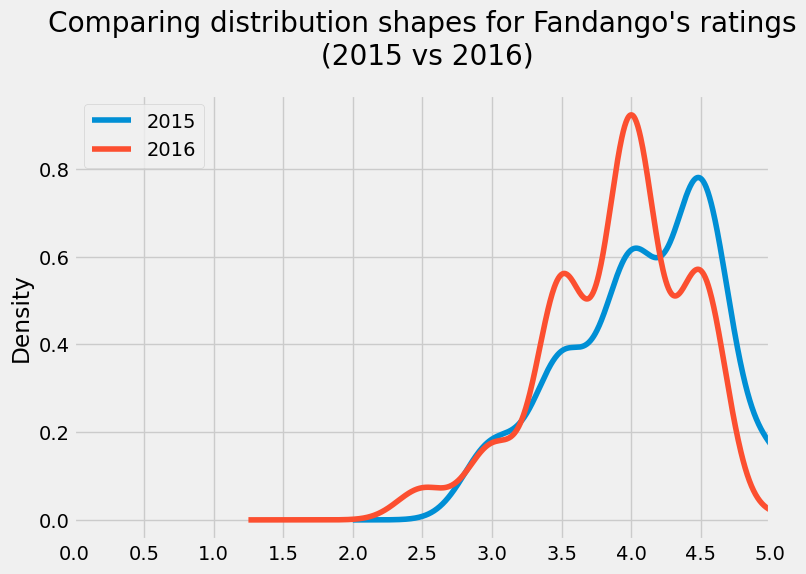

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
fandango_2015["Fandango_Stars"].plot.kde(label="2015", legend=True, figsize=(8,5.5))
fandango_2016["fandango"].plot.kde(label="2016", legend=True)
plt.title("Comparing distribution shapes for Fandango's ratings\n (2015 vs 2016)", y=1.05)
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.plot()

Looking at the above graph we can see that the distribution of the 2015 and 2016 Fandango ratings are strongly left-skewed. The distribution of the 2016 Fandango ratings is slightly shifted to the left compared the 2015 distribution.

The left-skew suggests that movies on Fandango are usually highly rated, 4-5 stars. If you take into account that Fandango also sells movie tickets this distribution is a little suspicious. 

Looking at the distribution we can see that there has been a slight change in the ratings in 2016 compared to the year before. Since the 2016 distribution is slightly shifted to the left we can see that the ratings were slightly lower that year compared to 2015.

# Comparing Relative Frequencies
Comparing the distributions of the Fandango ratings for both 2015 and 2016 showed us that there was a slight change in the ratings, so now we're going to look at some more granular information. We're going to examine the frequency tables of the two distributions, and since the datasets both have a different number of movies we're going normalize the tables and use percentages.

In [52]:
print("2015" + "\n" + "-" * 16)
fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index(ascending=False) * 100

2015
----------------


5.0     6.976744
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
Name: Fandango_Stars, dtype: float64

In [53]:
print("2016" + "\n" + "-" * 16)
fandango_2016["fandango"].value_counts(normalize=True).sort_index(ascending=False) * 100

2016
----------------


5.0     0.523560
4.5    24.607330
4.0    40.314136
3.5    24.083770
3.0     7.329843
2.5     3.141361
Name: fandango, dtype: float64

Looking at the tables above we can see that in 2016 there was a significantly less percentage of 4.5 - 5 star ratings compared to 2015. In 2016, less than 1% of the movies had a perfect rating of 5 stars, whereas in 2015 almost 7% of movies had a 5 star rating. Movies with 4.5 star ratings were also more popular in 2015 - there were approximately 13% more movies that had a 4.5 star rating in 2016 compared to 2015.

The minimum rating was also lower in 2016 at 2.5 stars compared to 2015 where the minimum rating was 3 stars.

For some other ratings, the percentage went up in 2016. The number of movies that had 4 stars in 2016 was up by approximately 12% compared to 2015 and the number of movies that 3.5 stars in 2016 was up by approximately 7% compared to 2015. This increase challenges the change that we saw in the kernel plot.  

# Determining the Direction of the Change
We've confirmed with the two frequency tables that there is a difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel plot.

So we'll take a couple of summary statistics to determine the direction of the change. We'll find the mean, median, and mode of both distributions and plot them on a bar graph.

In [68]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
median_2015 = fandango_2015["Fandango_Stars"].median()
mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]

mean_2016 = fandango_2016["fandango"].mean()
median_2016 = fandango_2016["fandango"].median()
mode_2016 = fandango_2016["fandango"].mode()[0]

summary = pd.DataFrame()
summary["2015"] = [mean_2015, median_2015, mode_2015]
summary["2016"] = [mean_2016, median_2016, mode_2016]
summary.index = ["mean", "median", "mode"]
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


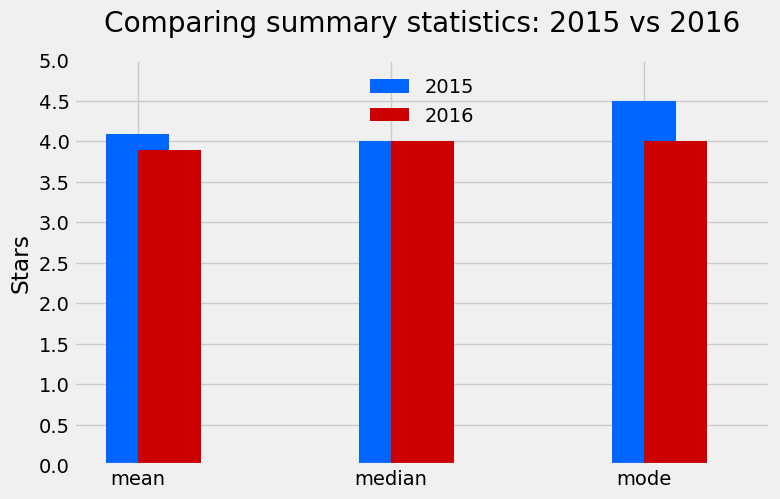

In [85]:
plt.style.use("fivethirtyeight")
summary["2015"].plot.bar(color="#0066FF", align="center", label="2015", width=.25)
summary["2016"].plot.bar(color="#CC0000", align="edge", label="2016", width=.25, rot=0, figsize=(8,5))
plt.title("Comparing summary statistics: 2015 vs 2016", y=1.05)
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.ylabel("Stars")
plt.legend(framealpha=0, loc="upper center")
plt.show()

We can see that in 2016 the mean for the ratings was slightly lower than the mean for the ratings in 2015, approximately a 0.2 decrease from 2015 to 2016. The median rating for both of the years was the same, 4.0. The mode for the ratings in 2016 was 4.0 compared to the mode in 2015 which was 4.5, a 0.5 decrease.

The direction of change we saw in the kernel plot is confirmed. On average popular movies in 2016 were rated slightly lower than popular movies in 2015.

# Conclusion
Our analysis shows that there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies in 2016 were rated slighly lower than popular movies in 2015.

We can't be entirely sure what caused this change, but the chances are high that it was caused by Fandango fixing their biased rating system after Hickey's analysis.